# Scenario Generation

Notebook for generating the scenarios for the team assignment.
<br>Datasets from: Pinson, P. (2013). Wind Energy: Forecasting Challenges for Its Operational Management. Statistical Science, 28(4). https://doi.org/10.1214/13-STS445


In [1]:
using CSV
using DataFrames
using Plots
using Statistics
using Distributions
using Random
using Clustering
using KernelDensity
using PrettyTables

In [2]:
using StatsModels, TimeSeries, StatsBase

In [3]:
gr()

Plots.GRBackend()

## Dataset Inspection

In [4]:
df_zone1 = CSV.read("data/scen_zone1.out", DataFrame)

┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 45. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\Zl2ww\src\file.jl:612


44×101 DataFrame
 Row │ Column1  V1               V2              V3               V4           ⋯
     │ String   Float64?         Float64?        Float64?         Float64?     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1              0.38446          0.5077          0.464001         0.4768 ⋯
   2 │ 2              0.334138         0.454995        0.545837         0.5396
   3 │ 3              0.39211          0.584795        0.714401         0.6739
   4 │ 4              0.320718         0.671243        0.797851         0.6683
   5 │ 5              0.511098         0.727537        0.804719         0.8265 ⋯
   6 │ 6              0.670195         0.655562        0.785114         0.8091
   7 │ 7              0.732583         0.768349        0.70783          0.7996
   8 │ 8              0.715879         0.816962        0.77647          0.8540
   9 │ 9              0.816484         0.722401        0.863191         0.9265 ⋯
  10 │ 10             0.863173         0.520111        0.833182         0.8900
  11 │ 11             0.834677         0.444936        0.774479         0.9362
  ⋮  │    ⋮            ⋮               ⋮                ⋮                ⋮     ⋱
  35 │ 35             0.253387         0.271667        0.317439         0.2068
  36 │ 36             0.105008         0.185463        0.215776         0.1909 ⋯
  37 │ 37             0.140265         0.145943        0.191948         0.1203
  38 │ 38             0.218467         0.165741        0.199312         0.1717
  39 │ 39             0.215151         0.186776        0.0822716        0.3001
  40 │ 40             0.23687          0.184147        0.0885939        0.2421 ⋯
  41 │ 41             0.139296         0.215371        0.121644         0.1511
  42 │ 42             0.116903         0.106516        0.162074         0.0877
  43 │ 43             0.0953018        0.132558        0.0916319        0.0510
  44 │ END      missing          missing         missing          missing      ⋯
                                                  97 columns and 23 rows omitted

In [5]:
df_zone1 = dropmissing(df_zone1, disallowmissing=true)
# Drops the first column!
select!(df_zone1, Not(1))
pretty_table(df_zone1)

┌───────────┬──────────┬───────────┬───────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬────────────┬───────────┬──────────┬──────────┬───────────┬───────────┬────────────┬───────────┬────────────┬────────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬───────────┬────────────┬──────────┬───────────┬────────────┬───────────┬────────────┬──────────┬───────────┬───────────┬──────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬───────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┬────────────┬──────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬───────────┬─────

In [6]:
describe(df_zone1)

100×7 DataFrame
 Row │ variable  mean      min         median    max       nmissing  eltype   
     │ Symbol    Float64   Float64     Float64   Float64   Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────
   1 │ V1        0.507327  0.0953018   0.539354  0.863173         0  Float64
   2 │ V2        0.456242  0.106516    0.49812   0.818464         0  Float64
   3 │ V3        0.533315  0.0822716   0.630709  0.863191         0  Float64
   4 │ V4        0.50238   0.0109027   0.643279  0.936282         0  Float64
   5 │ V5        0.470435  0.0         0.666735  0.818448         0  Float64
   6 │ V6        0.381401  0.0         0.354537  0.832788         0  Float64
   7 │ V7        0.443027  0.0676631   0.468877  0.85211          0  Float64
   8 │ V8        0.505733  0.0502404   0.681173  0.839562         0  Float64
   9 │ V9        0.529046  0.0551056   0.600574  0.867576         0  Float64
  10 │ V10       0.554556  0.0716024   0.556367  0.816731         0  Float64
  11 │ V11       0.581009  0.068279    0.743107  0.981795         0  Float64
  ⋮  │    ⋮         ⋮          ⋮          ⋮         ⋮         ⋮         ⋮
  91 │ V91       0.411357  0.0506172   0.319449  0.848011         0  Float64
  92 │ V92       0.425436  0.0725901   0.413748  0.986557         0  Float64
  93 │ V93       0.545593  0.0600499   0.641146  0.938806         0  Float64
  94 │ V94       0.515826  0.0576786   0.592232  0.833816         0  Float64
  95 │ V95       0.557865  0.0         0.681269  0.985896         0  Float64
  96 │ V96       0.328987  0.00270037  0.21545   0.767164         0  Float64
  97 │ V97       0.547774  0.110801    0.593345  0.851348         0  Float64
  98 │ V98       0.496096  0.0816591   0.505075  0.775203         0  Float64
  99 │ V99       0.586983  0.143854    0.614389  0.864252         0  Float64
 100 │ V100      0.50442   0.0346856   0.566492  0.954676         0  Float64
                                                               79 rows omitted

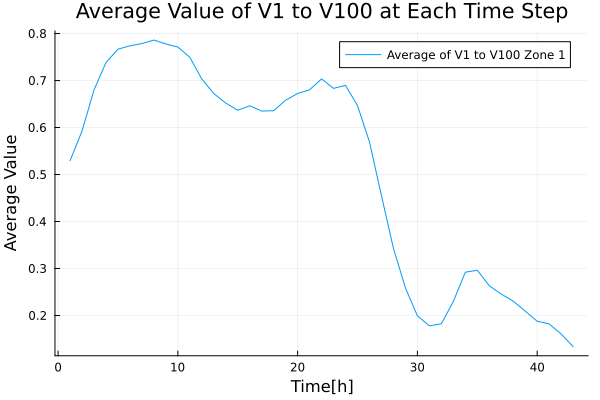

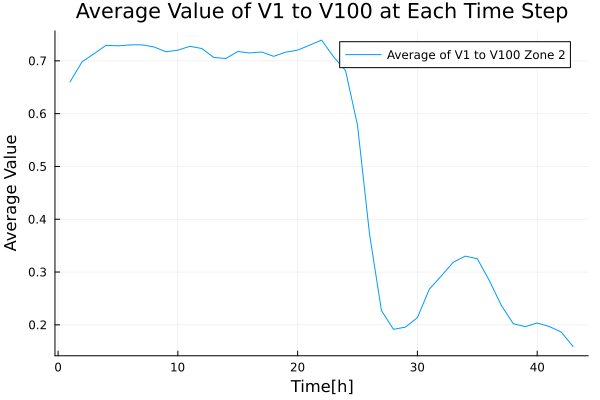

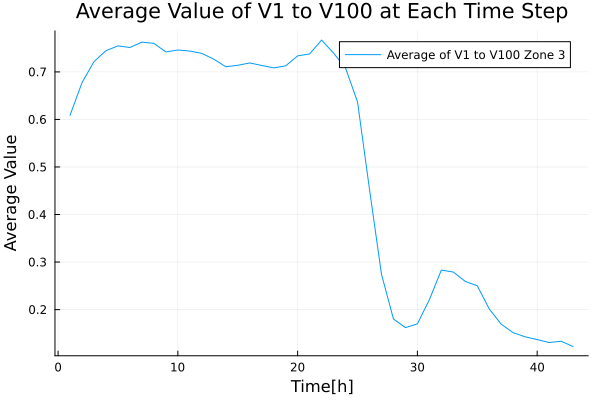

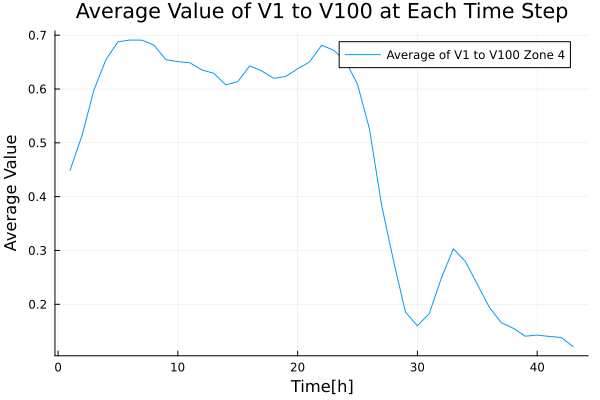

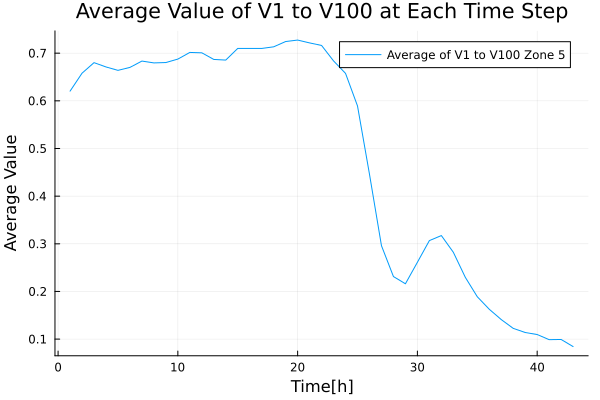

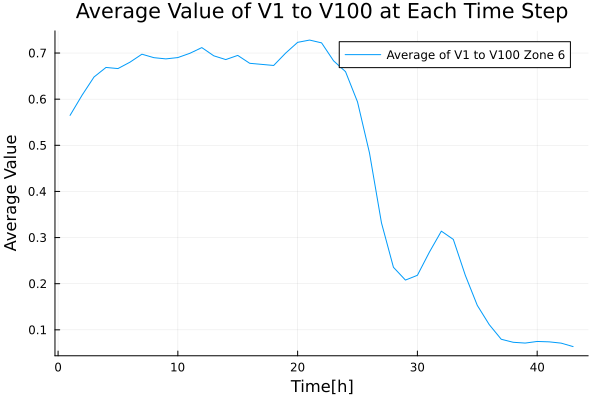

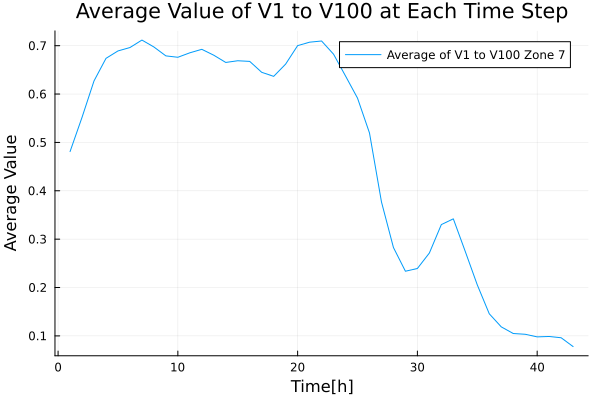

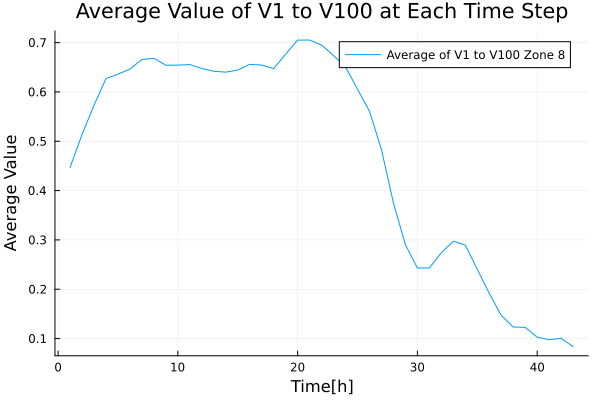

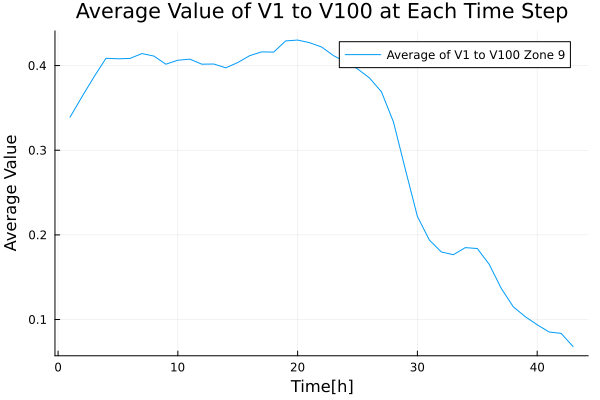

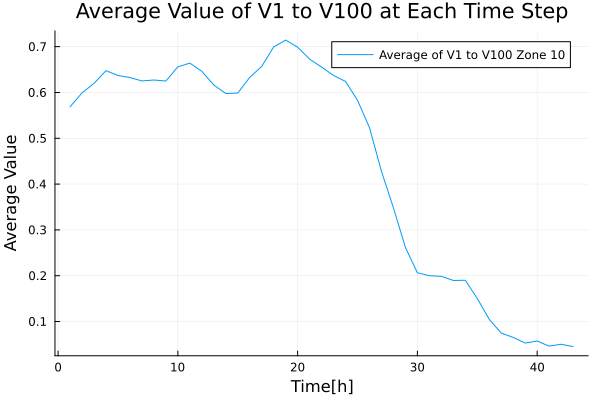

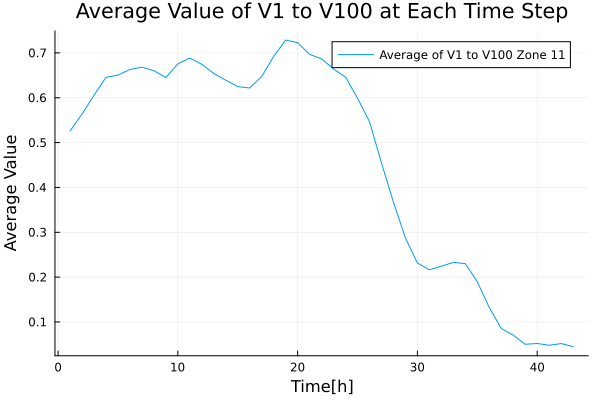

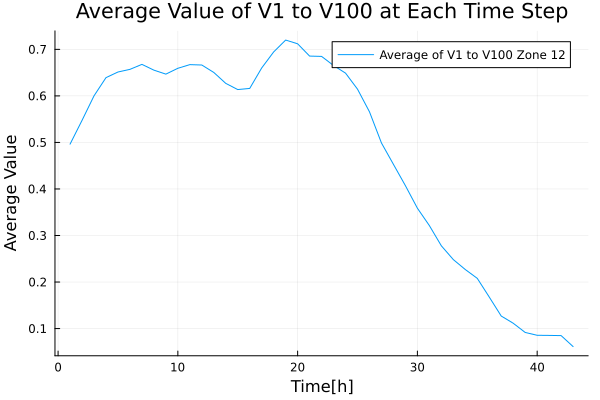

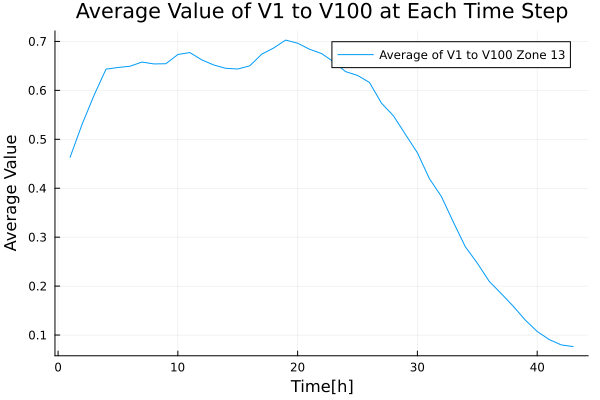

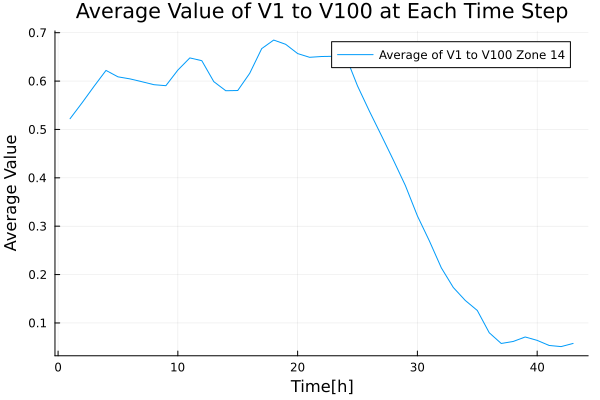

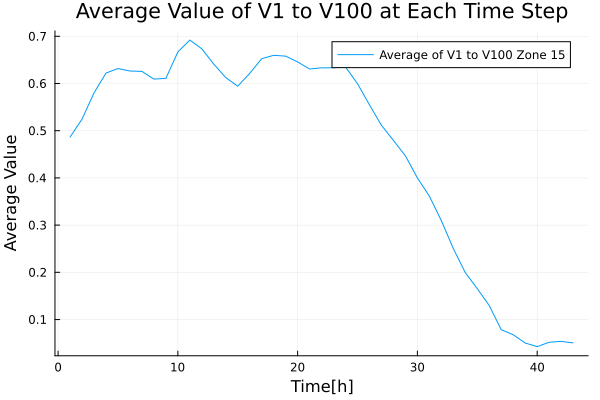

In [7]:
# Define the number of zones 
num_zones = 15

df_zones = DataFrame()

# Suppresses warnings about missing values
function suppress_csv_warnings(zone)
    file_path = "data/scen_zone$zone.out"
    return DataFrame(CSV.File(file_path, silencewarnings=true))
    
end

# Iterate over zones
for zone in 1:num_zones
    
    # Read dataframe
    df = suppress_csv_warnings(zone)

    # Clean dataframe
    df = dropmissing(df, disallowmissing=true)
    select!(df, Not(1))

    # Calculate and plot mean values
    row_means = [mean(skipmissing(row)) for row in eachrow(df)]
    df_means = DataFrame(RowMean = row_means)
    p = plot(df_means.RowMean, label="Average of V1 to V100 Zone $zone", xlabel="Time[h]", ylabel="Average Value", title="Average Value of V1 to V100 at Each Time Step")
    display(p) 

    # Rename column
    DataFrames.rename!(df_means, "RowMean" => "Avg_Zone_$zone")
       
    # Concatenate dataframes
    if ncol(df_zones) == 0
        df_zones = df_means
    else
        df_zones = hcat(df_zones, df_means, makeunique=true)
    end
end


<p><img src="images/western_denmark.png" alt="Map of Denmark depicting the 15 zones" width="400"/>
<img src="images/wind_power_measurements.jpg" alt="Plots showing the wind power measurements in the 15 zones" width="600"/></p>


For some reason, some deviations (e.g. plot of zone 1 code vs. image)

## Inter-zonal Relationships

In [8]:
df_zones

43×15 DataFrame
 Row │ Avg_Zone_1  Avg_Zone_2  Avg_Zone_3  Avg_Zone_4  Avg_Zone_5  Avg_Zone_6  ⋯
     │ Float64     Float64     Float64     Float64     Float64     Float64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   0.529259    0.660183    0.608828    0.448859   0.620302    0.56485    ⋯
   2 │   0.592708    0.698176    0.67751     0.513925   0.65799     0.608469
   3 │   0.680013    0.713454    0.72169     0.598506   0.680121    0.648035
   4 │   0.738374    0.729425    0.744719    0.654851   0.671094    0.668735
   5 │   0.766749    0.728429    0.754726    0.687775   0.663946    0.666317   ⋯
   6 │   0.773928    0.730288    0.751358    0.690962   0.670179    0.68012
   7 │   0.778704    0.730417    0.762698    0.690789   0.683436    0.69745
   8 │   0.786118    0.726389    0.759992    0.681714   0.67959     0.689923
   9 │   0.777854    0.717297    0.742022    0.654506   0.680343    0.687299   ⋯
  10 │   0.771308    0.720192    0.746077    0.650922   0.687605    0.690165
  11 │   0.749316    0.727594    0.743881    0.648865   0.701555    0.699372
  ⋮  │     ⋮           ⋮           ⋮           ⋮           ⋮           ⋮       ⋱
  34 │   0.29206     0.330153    0.259171    0.279739   0.229676    0.218246
  35 │   0.296341    0.325307    0.250096    0.23729    0.188931    0.153071   ⋯
  36 │   0.263336    0.284201    0.201341    0.194588   0.162669    0.111261
  37 │   0.245595    0.237196    0.169278    0.165844   0.141009    0.0796001
  38 │   0.230392    0.202193    0.151273    0.155512   0.122565    0.0730412
  39 │   0.20931     0.196612    0.142732    0.140727   0.113856    0.0713468  ⋯
  40 │   0.187828    0.203471    0.136908    0.142741   0.109598    0.074824
  41 │   0.182153    0.196952    0.130772    0.14027    0.098874    0.0739961
  42 │   0.160706    0.186598    0.133473    0.138389   0.0992646   0.071211
  43 │   0.133813    0.158813    0.122173    0.121364   0.0842963   0.0636902  ⋯
                                                   9 columns and 22 rows omitted

In [9]:
describe(df_zones)


15×7 DataFrame
 Row │ variable     mean      min        median    max       nmissing  eltype  ⋯
     │ Symbol       Float64   Float64    Float64   Float64   Int64     DataTyp ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Avg_Zone_1   0.508744  0.133813   0.635779  0.786118         0  Float64 ⋯
   2 │ Avg_Zone_2   0.515082  0.158813   0.698176  0.739397         0  Float64
   3 │ Avg_Zone_3   0.507002  0.122173   0.707932  0.766981         0  Float64
   4 │ Avg_Zone_4   0.460916  0.121364   0.607641  0.690962         0  Float64
   5 │ Avg_Zone_5   0.484658  0.0842963  0.65799   0.727509         0  Float64 ⋯
   6 │ Avg_Zone_6   0.471366  0.0636902  0.648035  0.728093         0  Float64
   7 │ Avg_Zone_7   0.475206  0.0778152  0.627172  0.711647         0  Float64
   8 │ Avg_Zone_8   0.470944  0.0837281  0.6055    0.705145         0  Float64
   9 │ Avg_Zone_9   0.313512  0.0680126  0.396128  0.430154         0  Float64 ⋯
  10 │ Avg_Zone_10  0.44484   0.0452001  0.598641  0.714402         0  Float64
  11 │ Avg_Zone_11  0.460604  0.0450717  0.605572  0.728625         0  Float64
  12 │ Avg_Zone_12  0.477343  0.0613024  0.613573  0.719921         0  Float64
  13 │ Avg_Zone_13  0.50135   0.0764243  0.630503  0.702752         0  Float64 ⋯
  14 │ Avg_Zone_14  0.442819  0.0510772  0.580504  0.684802         0  Float64
  15 │ Avg_Zone_15  0.459764  0.0426699  0.594286  0.692038         0  Float64
                                                                1 column omitted

In [10]:
# Correlation
cor_matrix = cor(Matrix(df_zones))
df_cor = DataFrame(cor_matrix, :auto)


15×15 DataFrame
 Row │ x1        x2        x3        x4        x5        x6        x7        x ⋯
     │ Float64   Float64   Float64   Float64   Float64   Float64   Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1.0       0.948881  0.970948  0.98485   0.948454  0.957351  0.964872  0 ⋯
   2 │ 0.948881  1.0       0.993085  0.960897  0.980553  0.97047   0.959608  0
   3 │ 0.970948  0.993085  1.0       0.983926  0.98867   0.986625  0.981173  0
   4 │ 0.98485   0.960897  0.983926  1.0       0.970995  0.981427  0.988827  0
   5 │ 0.948454  0.980553  0.98867   0.970995  1.0       0.995969  0.985681  0 ⋯
   6 │ 0.957351  0.97047   0.986625  0.981427  0.995969  1.0       0.995625  0
   7 │ 0.964872  0.959608  0.981173  0.988827  0.985681  0.995625  1.0       0
   8 │ 0.963525  0.930494  0.959123  0.98389   0.968407  0.981654  0.989014  1
   9 │ 0.939861  0.882464  0.915834  0.947238  0.938673  0.95099   0.956886  0 ⋯
  10 │ 0.960988  0.941734  0.964396  0.972998  0.979401  0.984049  0.979793  0
  11 │ 0.963401  0.936545  0.96199   0.977484  0.975669  0.984973  0.986043  0
  12 │ 0.939081  0.900059  0.931142  0.953247  0.956812  0.967947  0.971065  0
  13 │ 0.88878   0.83645   0.874616  0.908467  0.915087  0.930819  0.939792  0 ⋯
  14 │ 0.928582  0.891398  0.923088  0.94226   0.952335  0.960802  0.958065  0
  15 │ 0.907714  0.864963  0.900004  0.92443   0.935909  0.949196  0.952515  0
                                                               8 columns omitted

In [11]:
# Covariance
cov_matrix = cov(Matrix(df_zones), corrected=false)
df_cov = DataFrame(cov_matrix, :auto)


15×15 DataFrame
 Row │ x1         x2         x3         x4         x5         x6         x7    ⋯
     │ Float64    Float64    Float64    Float64    Float64    Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.0528533  0.0510732  0.0583884  0.0491585  0.0535794  0.0562292  0.052 ⋯
   2 │ 0.0510732  0.0548138  0.0608171  0.0488444  0.0564107  0.0580473  0.052
   3 │ 0.0583884  0.0608171  0.0684209  0.0558791  0.0635465  0.0659327  0.060
   4 │ 0.0491585  0.0488444  0.0558791  0.0471395  0.051803   0.0544384  0.050
   5 │ 0.0535794  0.0564107  0.0635465  0.051803   0.0603797  0.0625239  0.056 ⋯
   6 │ 0.0562292  0.0580473  0.0659327  0.0544384  0.0625239  0.0652693  0.059
   7 │ 0.0521782  0.0528473  0.0603704  0.0505006  0.0569725  0.0598321  0.055
   8 │ 0.048728   0.0479224  0.0551885  0.0469914  0.0523459  0.0551687  0.051
   9 │ 0.0269923  0.0258097  0.0299263  0.0256917  0.0288138  0.0303509  0.028 ⋯
  10 │ 0.0540781  0.0539686  0.0617473  0.0517097  0.058908   0.0615374  0.056
  11 │ 0.054459   0.0539138  0.0618716  0.0521829  0.0589487  0.0618736  0.057
  12 │ 0.0486123  0.0474486  0.0548426  0.0466021  0.0529395  0.0556819  0.051
  13 │ 0.0428276  0.0410467  0.0479519  0.0413424  0.0471305  0.0498441  0.046 ⋯
  14 │ 0.0497848  0.0486695  0.056309   0.0477094  0.0545727  0.0572439  0.052
  15 │ 0.0472507  0.0458528  0.0533043  0.0454453  0.0520718  0.0549077  0.050
                                                               9 columns omitted

In [17]:
# Calculate the average correlation for each zone, excluding the diagonal (self-correlation)
row_sums = sum(cor_matrix, dims=2) .- 1  # Subtract 1 for self-correlation
num_zones = size(cor_matrix, 2) - 1  # Subtract 1 to exclude self-correlation from count
average_correlations = row_sums / num_zones

# Convert to 1D array for easier handling
average_correlations = dropdims(average_correlations, dims=2)

# Print the average correlation values
for (index, avg_corr) in enumerate(average_correlations)
    println("Zone $index: $avg_corr")
end

# Find the zone with the highest average correlation
max_corr_value, max_corr_index = findmax(average_correlations)
println("Zone with the highest average correlation is Zone $max_corr_index with an average of $max_corr_value")


Zone 1: 0.9476633642129558
Zone 2: 0.9284001335885591
Zone 3: 0.9524728378712517
Zone 4: 0.9629240320606216
Zone 5: 0.963758296259244
Zone 6: 0.9712784054146891
Zone 7: 0.9720686209907867
Zone 8: 0.9734535590968286
Zone 9: 0.9590844677149301
Zone 10: 0.9746989616644646
Zone 11: 0.9772049474195131
Zone 12: 0.9678341826826761
Zone 13: 0.9365418918788004
Zone 14: 0.9610394835225755
Zone 15: 0.9504397537152652
Zone with the highest average correlation is Zone 11 with an average of 0.9772049474195131


<img src="images/western_denmark_real_map.jpg" alt="Google Maps and Zone Map overlay" width="400"/>

We thus use historic wind data measurements from Billund, Denmark because it it located in zone 11 that has the highest average wind power measurement correlation to all other zones.

## Wind Speed Data

The dataset was obtained from https://open-meteo.com/en/docs/historical-weather-api <br>
Location: 55.711773; 9.146341 <br>
Elevation: 61.0 Meters <br>
Time Zone: Europe/Berlin,CET <br>
Time Frame: 2023-07-03 T00:00:00	to 2024-01-31 T00:00:00

In [18]:
df_billund = CSV.read("data/open_meteo_billund.csv", DataFrame)

5112×6 DataFrame
  Row │ time                 wind_speed_10m (km/h)  wind_speed_100m (km/h)  wi ⋯
      │ DateTime             Float64                Float64                 Fl ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2023-07-03T00:00:00                   25.4                    41.1     ⋯
    2 │ 2023-07-03T01:00:00                   23.3                    38.3
    3 │ 2023-07-03T02:00:00                   23.9                    39.4
    4 │ 2023-07-03T03:00:00                   22.4                    36.4
    5 │ 2023-07-03T04:00:00                   21.6                    35.3     ⋯
    6 │ 2023-07-03T05:00:00                   20.3                    33.4
    7 │ 2023-07-03T06:00:00                   21.7                    34.9
    8 │ 2023-07-03T07:00:00                   22.7                    34.4
    9 │ 2023-07-03T08:00:00                   25.4                    36.4     ⋯
   10 │ 2023-07-03T09:00:00                   30.4                    43.1
   11 │ 2023-07-03T10:00:00                   30.8                    42.8
  ⋮   │          ⋮                     ⋮                      ⋮                ⋱
 5103 │ 2024-01-31T14:00:00                  NaN                     NaN
 5104 │ 2024-01-31T15:00:00                  NaN                     NaN       ⋯
 5105 │ 2024-01-31T16:00:00                  NaN                     NaN
 5106 │ 2024-01-31T17:00:00                  NaN                     NaN
 5107 │ 2024-01-31T18:00:00                  NaN                     NaN
 5108 │ 2024-01-31T19:00:00                  NaN                     NaN       ⋯
 5109 │ 2024-01-31T20:00:00                  NaN                     NaN
 5110 │ 2024-01-31T21:00:00                  NaN                     NaN
 5111 │ 2024-01-31T22:00:00                  NaN                     NaN
 5112 │ 2024-01-31T23:00:00                  NaN                     NaN       ⋯
                                                 3 columns and 5091 rows omitted

In [20]:
# Rename columns
DataFrames.rename!(df_billund, :time => :date_time, Symbol("wind_speed_10m (km/h)") => :wind_speed_10m, Symbol("wind_speed_100m (km/h)") => :wind_speed_100m)
# Drop missing values
df_billund = df_billund[.!isnan.(df_billund[!, :wind_speed_100m]), :]
df_billund = dropmissing(df_billund)


5089×6 DataFrame
  Row │ date_time            wind_speed_10m  wind_speed_100m  wind_direction_1 ⋯
      │ DateTime             Float64         Float64          Float64          ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2023-07-03T00:00:00            25.4             41.1                   ⋯
    2 │ 2023-07-03T01:00:00            23.3             38.3
    3 │ 2023-07-03T02:00:00            23.9             39.4
    4 │ 2023-07-03T03:00:00            22.4             36.4
    5 │ 2023-07-03T04:00:00            21.6             35.3                   ⋯
    6 │ 2023-07-03T05:00:00            20.3             33.4
    7 │ 2023-07-03T06:00:00            21.7             34.9
    8 │ 2023-07-03T07:00:00            22.7             34.4
    9 │ 2023-07-03T08:00:00            25.4             36.4                   ⋯
   10 │ 2023-07-03T09:00:00            30.4             43.1
   11 │ 2023-07-03T10:00:00            30.8             42.8
  ⋮   │          ⋮                 ⋮                ⋮                   ⋮      ⋱
 5080 │ 2024-01-30T15:00:00            21.1             33.7
 5081 │ 2024-01-30T16:00:00            20.9             33.6                   ⋯
 5082 │ 2024-01-30T17:00:00            21.1             35.0
 5083 │ 2024-01-30T18:00:00            22.2             36.2
 5084 │ 2024-01-30T19:00:00            20.7             34.6
 5085 │ 2024-01-30T20:00:00            19.4             32.4                   ⋯
 5086 │ 2024-01-30T21:00:00            16.6             28.0
 5087 │ 2024-01-30T22:00:00            15.5             26.3
 5088 │ 2024-01-30T23:00:00            16.2             26.1
 5089 │ 2024-01-31T00:00:00            25.1             38.8                   ⋯
                                                 3 columns and 5068 rows omitted

In [21]:
describe(df_billund)

6×7 DataFrame
 Row │ variable                 mean     min                  median           ⋯
     │ Symbol                   Union…   Any                  Any              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ date_time                         2023-07-03T00:00:00  2023-10-17T00:00 ⋯
   2 │ wind_speed_10m           17.0017  0.0                  15.6
   3 │ wind_speed_100m          28.169   0.4                  26.6
   4 │ wind_direction_10m (°)   196.081  1.0                  215.0
   5 │ wind_direction_100m (°)  199.547  1.0                  219.0            ⋯
   6 │ wind_gusts_10m (km/h)    31.6987  2.9                  29.5
                                                               4 columns omitted

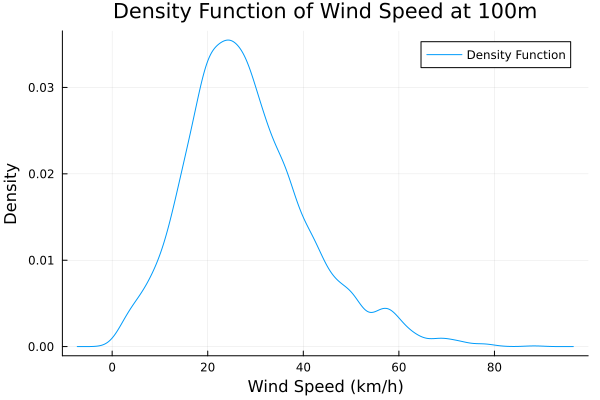

In [22]:
# Filter out NaN and missing values from the wind speed at 100m column
clean_wind_speed_100m = filter(!isnan, df_billund[!, :wind_speed_100m])

# Calculate the density estimation
density_estimation = kde(clean_wind_speed_100m)

# Extract the points of evaluation and their density values
xs = density_estimation.x
densities = density_estimation.density

# Plot the density function
plot(xs, densities, title="Density Function of Wind Speed at 100m", xlabel="Wind Speed (km/h)", ylabel="Density", label="Density Function")


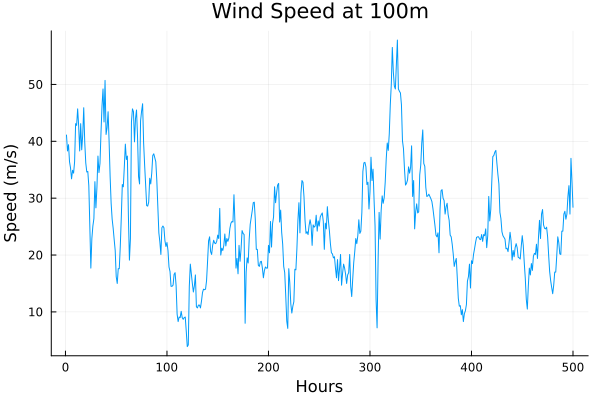

In [62]:
using Plots
using DataFrames

# Assuming df_billund is your DataFrame and it has a column :wind_speed_100m
# Filter out rows where :wind_speed_100m is NaN
clean_wind_speed_100m = df_billund[.!isnan.(df_billund[!, :wind_speed_100m]), :]

# Check if there are at least 100 values
if size(clean_wind_speed_100m, 1) >= 100
    # Take the first 100 values of the wind_speed_100m column
    wind_speed_100m_subset = clean_wind_speed_100m[1:500, :wind_speed_100m]

    # Create a plot
    plot(wind_speed_100m_subset, title = "Wind Speed at 100m", xlabel = "Hours", ylabel = "Speed (m/s)", legend = false)
else
    println("Not enough data to plot 100 values.")
end


## Generate 1D scenarios (no 24 hours)

In [24]:
# Set a seed for reproducibility
Random.seed!(123)

clean_wind_speed_100m = filter(!isnan, df_billund[!, :wind_speed_100m])

# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Generate 1000 scenarios based on the fitted Weibull distribution
scenarios = rand(params, 1000)

# Now 'scenarios' contains 1000 wind speed values sampled from the fitted Weibull distribution


1000-element Vector{Float64}:
 34.075431809777356
 40.55226318549201
 31.887474426890577
 20.21327727034601
 26.109131889240206
 34.14205221228204
  8.356262342711382
 25.470278716419
 37.113751887734324
 28.317781945135838
 30.851733997144365
 31.533392209129865
  8.763877657589179
  ⋮
  9.802051013522794
 17.22703330144504
 21.457152544278223
 17.28950132741
 14.441113241212834
 33.31361936831371
 28.69945048378058
 28.399808911272107
 29.796567892857507
 30.683474860399187
 24.39974625087614
 41.63748947098258

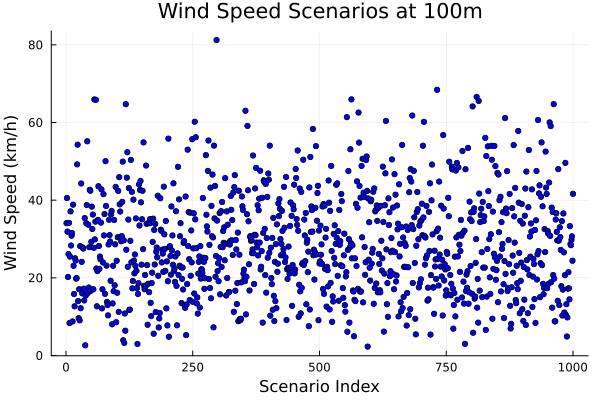

In [25]:
# Create an array for the scenario indices
scenario_indices = 1:length(scenarios)

# Generate the scatter plot
scatter(scenario_indices, scenarios, 
        title = "Wind Speed Scenarios at 100m", 
        xlabel = "Scenario Index", 
        ylabel = "Wind Speed (km/h)", 
        legend = false,
        color = "blue",
        markersize = 3)

# Display the plot
display(current())


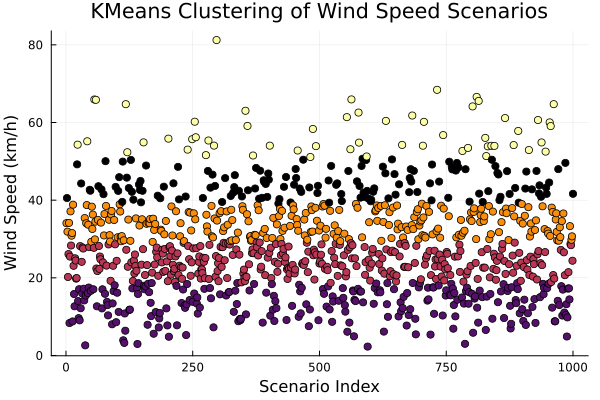

In [26]:
# Reshape the scenarios to a 2D array with one feature per row
# Since you have only one feature (wind speed), it becomes a single-row matrix
data_matrix = reshape(scenarios, 1, :)

# Determine the number of clusters you want to find, for example, k = 3
k = 5

# Run the KMeans algorithm
result = kmeans(data_matrix, k; maxiter=200, init=:kmpp)

# The output 'result' contains several fields, including:
#   - result.assignments: the cluster index for each scenario
#   - result.centers: the center of each cluster
#   - result.counts: the number of scenarios in each cluster

# You can also assign the scenarios to their clusters
clusters = assignments(result)

# If you want to visualize the clusters, you can plot them
using Plots

# Since we only have one feature, we'll use the scenario index as the x-axis and the scenario value as the y-axis
# Color the points based on the cluster assignment
scatter(1:length(scenarios), scenarios, zcolor=clusters, palette=:Set1,
        title="KMeans Clustering of Wind Speed Scenarios",
        xlabel="Scenario Index", ylabel="Wind Speed (km/h)",
        legend=false)


## Generate 24 hour scenarios

In [64]:
# Set a seed for reproducibility
Random.seed!(123)
clean_wind_speed_100m = filter(!isnan, df_billund[!, :wind_speed_100m])

# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Initialize a matrix with 1000 rows and 24 columns
scenario_matrix = Matrix{Float64}(undef, 10000, 24)

# Generate 1000 scenarios, each with 24 values, and fill the matrix
for i in 1:10000
    scenario_matrix[i, :] = rand(params, 24)
end

scenario_matrix
# 'scenario_matrix' is now a 1000x24 matrix where each row represents a scenario


10000×24 Matrix{Float64}:
 34.0754   40.5523  31.8875   20.2133   …  49.2213   54.2931   14.0104
  9.61649  17.0684   9.04914  28.1608      27.9017   42.6779   42.4314
 16.6593   29.2746  38.3305   32.5822      42.7805   12.1252   17.0443
 23.9529   41.5436  30.9156   36.4338      16.5623   34.8937   18.0822
 28.6264   43.4187   8.56454  24.3814      64.7194   27.2235   45.7999
 52.3468   22.8453  35.0007   43.1244   …  15.8337   18.6216   44.0359
 33.4711   42.6189  44.9478   39.4383      35.1318   13.5639   10.1326
 18.6555   21.3268  29.2499   35.2308      27.2485   26.2328   21.5335
 43.4762   31.2004  27.4472   21.7847      22.3237   18.9544   25.5086
 37.1427   17.9214   7.76875  26.2929      13.1364   18.3974   53.0126
 28.1978   36.9285  24.8021   14.2777   …  24.1016   25.5137   12.3443
 28.1704   19.8045  22.1855   22.1704      14.7204   38.5291   30.7065
 46.5866   30.4007   7.24498  54.0498      32.0402   29.0158   32.9977
  ⋮                                     ⋱          

In [29]:
# Only execute this code for <10 scenarios
"""
# Let's assume 'scenario_matrix' is your 100x24 matrix with the scenarios.
num_scenarios, num_hours = size(scenario_matrix)

# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.
# Here, we plot all scenarios with some transparency.
plot(legend = false, xlabel = "Hour", ylabel = "Wind Speed (km/h)", title = "Wind Speed Scenarios Over Time")

for i in 1:num_scenarios
    plot!(1:num_hours, scenario_matrix[i, :], label = "", alpha = 0.5)  # Using alpha for transparency
end

# Display the plot
display(current())
"""

"# Let's assume 'scenario_matrix' is your 100x24 matrix with the scenarios.\nnum_scenarios, num_hours = size(scenario_matrix)\n\n# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.\n# Here, we plot all scenarios with some transpa" ⋯ 18 bytes ⋯ " = false, xlabel = \"Hour\", ylabel = \"Wind Speed (km/h)\", title = \"Wind Speed Scenarios Over Time\")\n\nfor i in 1:num_scenarios\n    plot!(1:num_hours, scenario_matrix[i, :], label = \"\", alpha = 0.5)  # Using alpha for transparency\nend\n\n# Display the plot\ndisplay(current())\n"

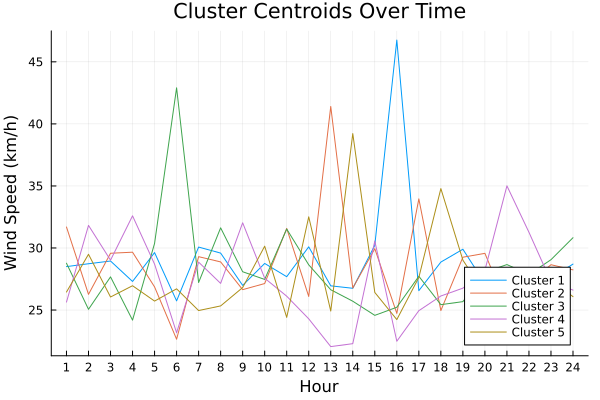

In [66]:
# Transpose the scenario_matrix to fit the KMeans requirements
# Each column represents a data point for KMeans
data_for_kmeans = transpose(scenario_matrix)

# Determine the number of clusters, k = 2
k = 5

# Run the KMeans algorithm
result = kmeans(data_for_kmeans, k; maxiter=200, init=:kmpp)
# Assuming 'scenario_matrix' is your 1000x24 matrix with the scenarios
# and 'result' is the output from kmeans

# Extract the cluster centroids by transposing
centroids = result.centers'

# The centroids matrix has 'k' rows and 'num_hours' columns
num_hours = size(centroids, 2)

# Initialize the plot with the correct number of ticks on the x-axis
plot(xticks=1:num_hours, legend=:bottomright, xlabel="Hour", ylabel="Wind Speed (km/h)", title="Cluster Centroids Over Time")

# Plot each centroid as a separate line
for i = 1:size(centroids, 1)
    plot!(1:num_hours, centroids[i, :], label="Cluster $i")
end

# Show the plot
display(current())



## Considering Time Series Data

Using basic normal distribution "time series" data.

In [74]:
# Set a seed for reproducibility
Random.seed!(123)

clean_wind_speed_100m = filter(!isnan, df_billund[!, :wind_speed_100m])

# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Initialize a matrix with 1000 rows and 24 columns
scenario_matrix = Matrix{Float64}(undef, 10000, 24)

# Define a small standard deviation for the normal distribution increments
std_dev_increment = 10.0  # Adjust this value as needed for your application

# Generate 1000 scenarios, each with 24 values, and fill the matrix
for i in 1:10000
    # Start the first hour with a random value from the Weibull distribution
    scenario_matrix[i, 1] = rand(params)
    for j in 2:24
        # Generate a small random increment
        increment = rand(Normal(0, std_dev_increment))
        
        # The next value is the previous value plus the increment
        # Use the max function to ensure that the value doesn't go below a certain threshold (e.g., 0)
        scenario_matrix[i, j] = max(scenario_matrix[i, j-1] + increment, 0)
    end
end

scenario_matrix
# 'scenario_matrix' is now a 1000x24 matrix where each row represents a scenario


10000×24 Matrix{Float64}:
 34.0754   19.4429    3.20688   1.03023  …    0.406722    0.0        3.88407
  9.61649  12.3524   12.9234   16.9149       59.9581     40.5252    23.0919
 16.6593   22.6015   32.005    28.674        33.7504     35.1571    49.7308
 23.1462   17.8903   27.8972   15.4398       44.1594     46.7743    51.0742
 16.5623   25.4102   24.0313   17.355        19.8007     18.5612    18.8336
 64.7194   53.6228   35.0481   24.1229   …   12.6458      5.71656    5.67429
 15.8337   17.4696    0.0       0.0          19.2414     23.9253    19.7861
 35.1318   37.1365   38.1864   34.3603        4.44175     0.0        6.86645
 32.0951   41.4118   36.9214   39.505        51.8492     67.3267    62.2926
 44.3372   48.5892   53.6385   54.7457        5.31228    15.2334     6.92498
 12.8631   14.1264    3.71001   3.67004  …    0.0        19.7076    35.1899
 13.3944   15.1402   17.8107   31.0707        0.0         0.0        0.0
 19.6922   16.446    19.4747   38.3465      112.024     105.5

In [34]:
# Only execute for <10 scenarios
"""
num_scenarios, num_hours = size(scenario_matrix)

# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.
# Here, we plot all scenarios with some transparency.
plot(legend = false, xlabel = "Hour", ylabel = "Wind Speed (km/h)", title = "Wind Speed Scenarios Over Time")

for i in 1:num_scenarios
  # plot!(1:num_hours, scenario_matrix[i, :], label = "", alpha = 0.5)  # Using alpha for transparency
end

# Display the plot
display(current())
"""

"num_scenarios, num_hours = size(scenario_matrix)\n\n# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.\n# Here, we plot all scenarios with some transparency.\nplot(legend = false, xlabel = \"Hour\", ylabel = \"Wind Speed (km/h)\", title = \"Wind Speed Scenarios Over Time\")\n\nfor i in 1:num_scenarios\n  # plot!(1:num_hours, scenario_matrix[i, :], label = \"\", alpha = 0.5)  # Using alpha for transparency\nend\n\n# Display the plot\ndisplay(current())\n"

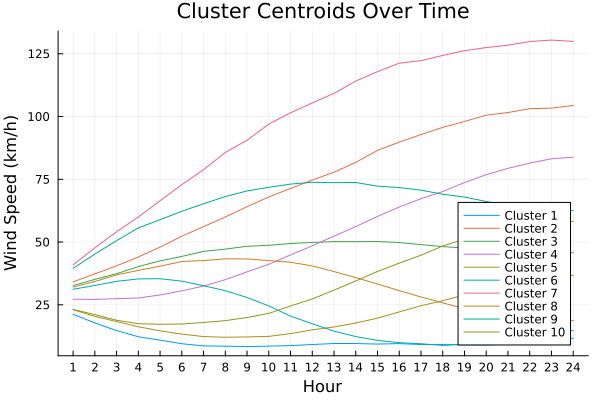

In [75]:
# Transpose the scenario_matrix to fit the KMeans requirements
# Each column represents a data point for KMeans
data_for_kmeans = transpose(scenario_matrix)

# Determine the number of clusters, k = 2
k = 10

# Run the KMeans algorithm
result = kmeans(data_for_kmeans, k; maxiter=200, init=:kmpp)
# Assuming 'scenario_matrix' is your 1000x24 matrix with the scenarios
# and 'result' is the output from kmeans

# Extract the cluster centroids by transposing
centroids = result.centers'

# The centroids matrix has 'k' rows and 'num_hours' columns
num_hours = size(centroids, 2)

# Initialize the plot with the correct number of ticks on the x-axis
plot(xticks=1:num_hours, legend=:bottomright, xlabel="Hour", ylabel="Wind Speed (km/h)", title="Cluster Centroids Over Time")

# Plot each centroid as a separate line
for i = 1:size(centroids, 1)
    plot!(1:num_hours, centroids[i, :], label="Cluster $i")
end

# Show the plot
display(current())



## "Nudging"

In [100]:
# Set a seed for reproducibility
Random.seed!(123)

# Assuming 'clean_wind_speed_100m' has been properly defined and filtered
# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Initialize a matrix with 10000 rows and 24 columns
scenario_matrix = Matrix{Float64}(undef, 10000, 24)

# Define a small standard deviation for the normal distribution increments
std_dev_increment = 2.0  # Adjust this value as needed for your application

# Define a nudge factor to control how much we "nudge" towards the previous value
nudge_factor = 0.05  # Adjust this between 0 and 1 as needed

# Generate 10000 scenarios, each with 24 values, and fill the matrix
for i in 1:10000
    # Start the first hour with a random value from the Weibull distribution
    scenario_matrix[i, 1] = rand(params)
    for j in 2:24
        # Generate a random value from the Weibull distribution
        weibull_value = rand(params)
        
        # Calculate the difference between the new Weibull value and the previous value
        difference = weibull_value - scenario_matrix[i, j-1]
        
        # Nudge the Weibull value towards the previous value using the normal distribution
        # Adjust the nudge factor as needed
        nudge = rand(Normal(0, std_dev_increment)) * nudge_factor
        
        # The next value is the Weibull value plus a proportion of the nudge
        scenario_matrix[i, j] = max(weibull_value + nudge * difference, 0)
    end
end

scenario_matrix


10000×24 Matrix{Float64}:
 34.0754   39.5007   19.2639  34.261   …  56.2459   33.1828  28.928
 42.4314   15.1279   37.5576  36.3189     17.4556   32.2009  17.0761
 23.0961   15.9842   17.9421  43.6696     24.5371   25.9696  36.2533
 17.3547    4.29065  15.5124  35.0739     27.8243   41.695    7.07072
 10.9445   42.5191   31.1239  27.1484     23.3016   33.6889  13.1269
 22.6402   16.4252   29.5821  14.072   …  24.999    17.0835  23.1285
 36.2422   33.4577   44.144   20.4859     34.009    15.6638  29.366
 41.0828   37.0549   34.9275  41.8953     29.6682   27.1102  26.3227
 31.0809   43.3556   47.9396  27.0207     14.9181   12.3963  21.0621
 39.1408   35.281    37.9875  25.0412     16.2202   16.5103  40.464
 23.56     23.9333   23.1975  31.2249  …  17.7408   16.0192  21.9885
 32.6135   14.4327   21.7953  42.853       5.35561  53.5029  11.3449
 53.1113   22.0232   24.9632  16.9637     36.6221   22.9345  26.9929
  ⋮                                    ⋱                     
 20.4771   12.014

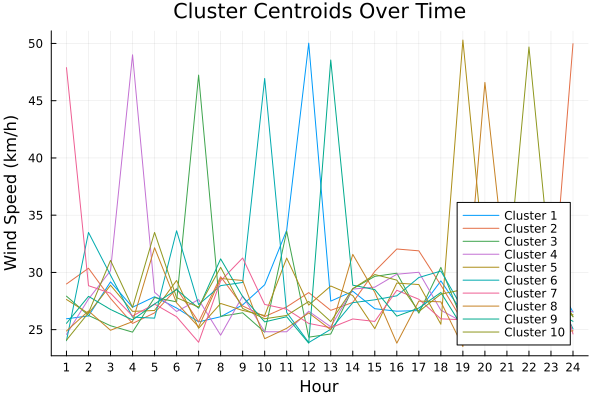

In [101]:
# Transpose the scenario_matrix to fit the KMeans requirements
# Each column represents a data point for KMeans
data_for_kmeans = transpose(scenario_matrix)

# Determine the number of clusters, k = 2
k = 10

# Run the KMeans algorithm
result = kmeans(data_for_kmeans, k; maxiter=200, init=:kmpp)
# Assuming 'scenario_matrix' is your 1000x24 matrix with the scenarios
# and 'result' is the output from kmeans

# Extract the cluster centroids by transposing
centroids = result.centers'

# The centroids matrix has 'k' rows and 'num_hours' columns
num_hours = size(centroids, 2)

# Initialize the plot with the correct number of ticks on the x-axis
plot(xticks=1:num_hours, legend=:bottomright, xlabel="Hour", ylabel="Wind Speed (km/h)", title="Cluster Centroids Over Time")

# Plot each centroid as a separate line
for i = 1:size(centroids, 1)
    plot!(1:num_hours, centroids[i, :], label="Cluster $i")
end

# Show the plot
display(current())

